## PREPROCESADO

In [3]:
# Primero se instalan las librerías necesarias
!pip install pandas numpy matplotlib seaborn

In [5]:
# Se importan las ibrerias necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Primero cargamos el dataset descargado de Kaggle en el entorno Colab, y se lee el archivo CSV.
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [16]:
# Columnas relevantes para el estudio
columnas_conservadas = ['Name', 'Year_of_Release', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Filtrar el DataFrame para conservar solo las columnas seleccionadas
df_filtrado = df[columnas_conservadas]

# Mostrar las primeras filas del DataFrame filtrado
print(df_filtrado.head())

                       Name  Year_of_Release Platform         Genre  NA_Sales  \
0                Wii Sports           2006.0      Wii        Sports     41.36   
1         Super Mario Bros.           1985.0      NES      Platform     29.08   
2            Mario Kart Wii           2008.0      Wii        Racing     15.68   
3         Wii Sports Resort           2009.0      Wii        Sports     15.61   
4  Pokemon Red/Pokemon Blue           1996.0       GB  Role-Playing     11.27   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     28.96      3.77         8.45         82.53  
1      3.58      6.81         0.77         40.24  
2     12.76      3.79         3.29         35.52  
3     10.93      3.28         2.95         32.77  
4      8.89     10.22         1.00         31.37  


In [18]:
# Se identifican los valores nulos en el dataframe con el método isnull()
print("\nConteo de valores faltantes por columna:")
print(df_filtrado.isnull().sum())


Conteo de valores faltantes por columna:
Name                 2
Year_of_Release    269
Platform             0
Genre                2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64


## Análisis Exploratorio de Datos (EDA)
Primero, se hace un análisis introductorio muy general al DataFrame filtrado, donde se busca comprender temas como:

1. Ventas totales por cada género de videojuego.
2. Comparación general de las ventas por cada región.

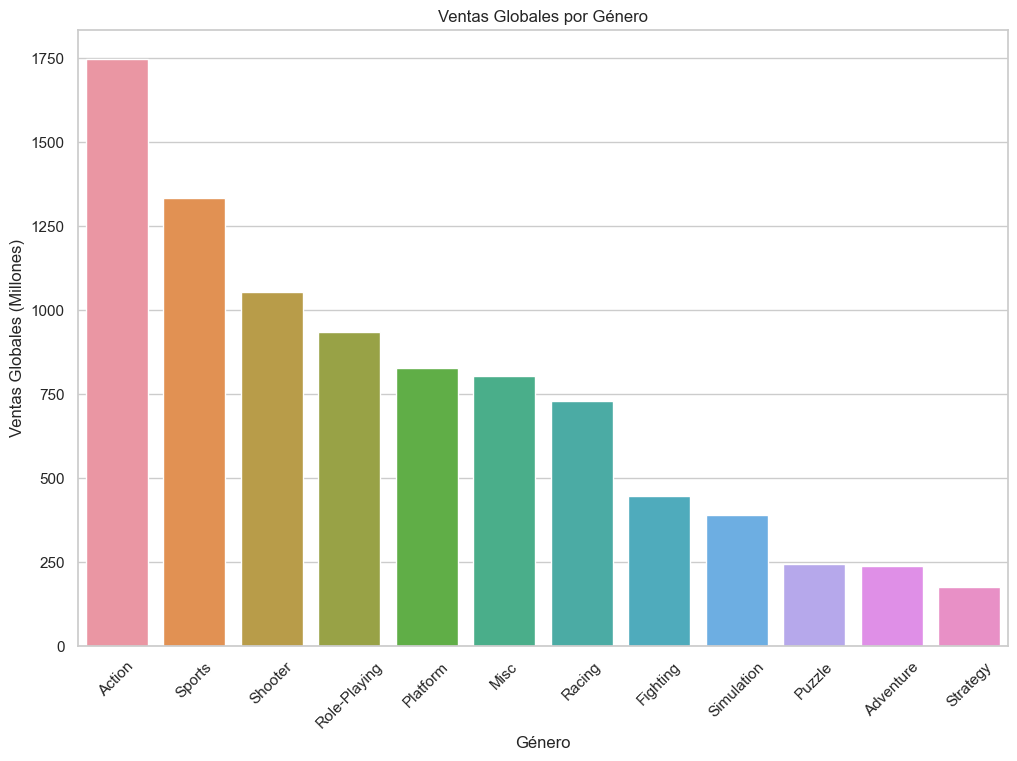

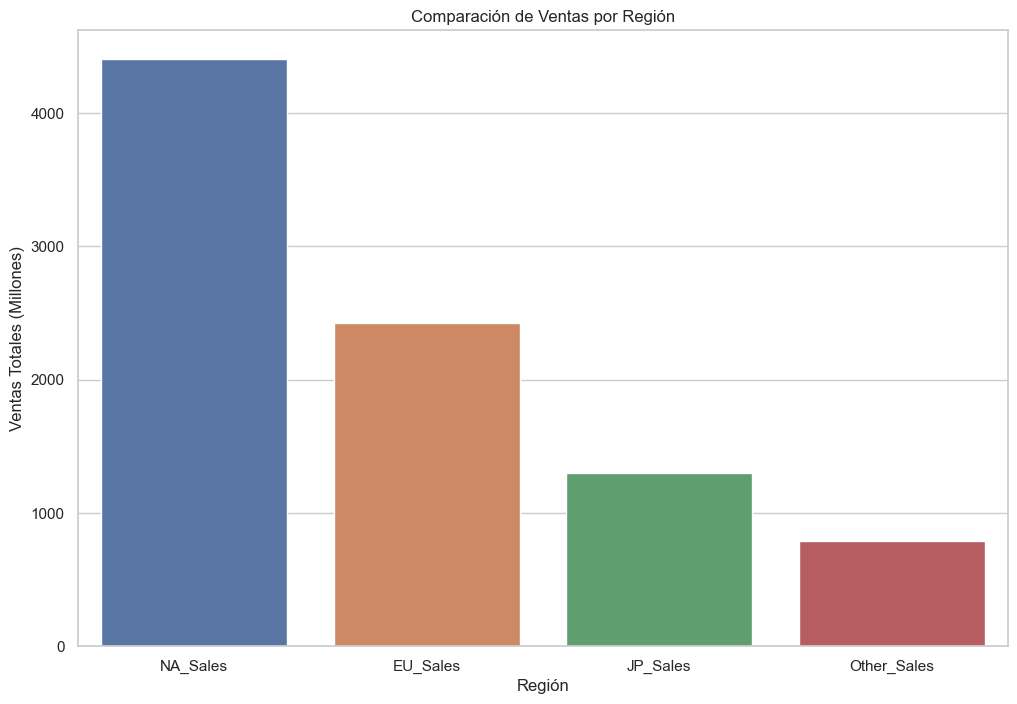

In [24]:
# Primero se configuran estilos de seaborn para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# 1. Ventas por Género
plt.figure(figsize=(12, 8))
genre_sales = df_filtrado.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Ventas Globales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (Millones)')
plt.xticks(rotation=45)
plt.show()

# 2. Comparación de Ventas por Región
plt.figure(figsize=(12, 8))
regional_sales = df_filtrado[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Comparación de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales (Millones)')
plt.show()

*Ahora, se procede con la realizan de los códigos que permiten responder o realizar los hallazgos que se pidieron a manera de reto.*

### ¿Cuál es el género que más se vende por región?

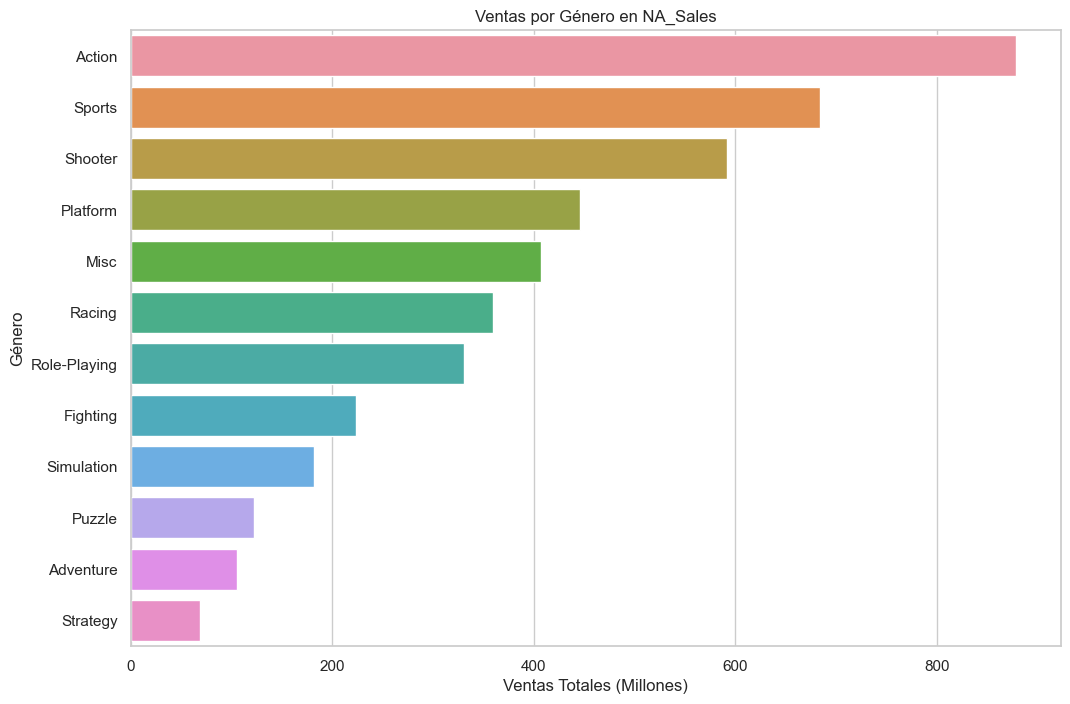

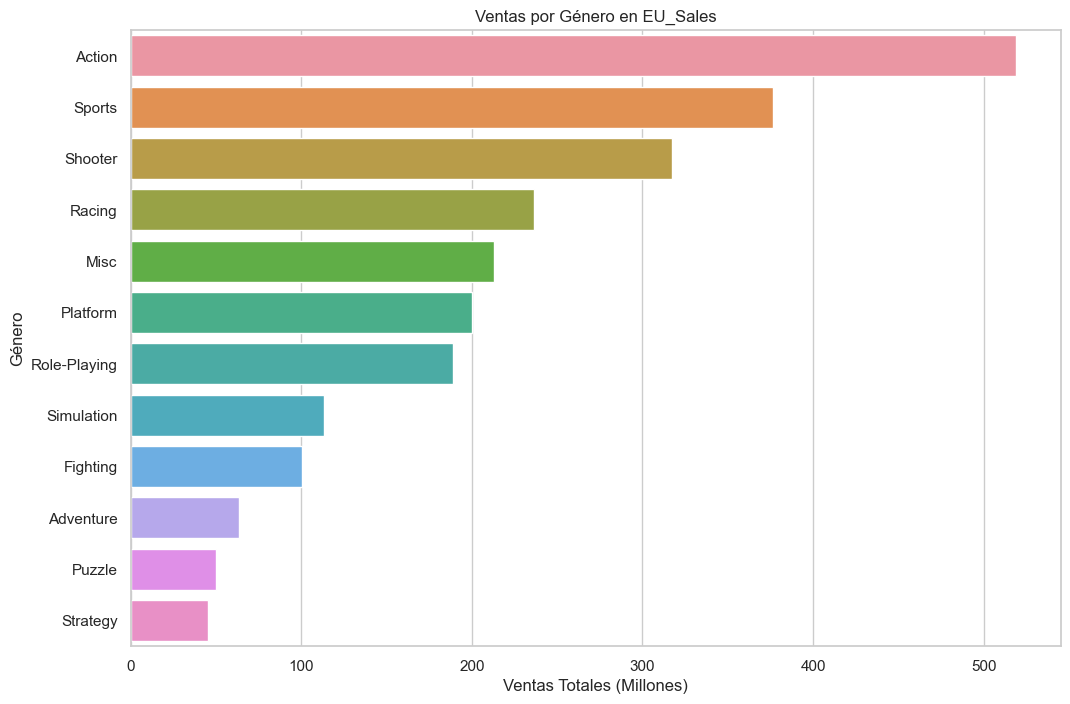

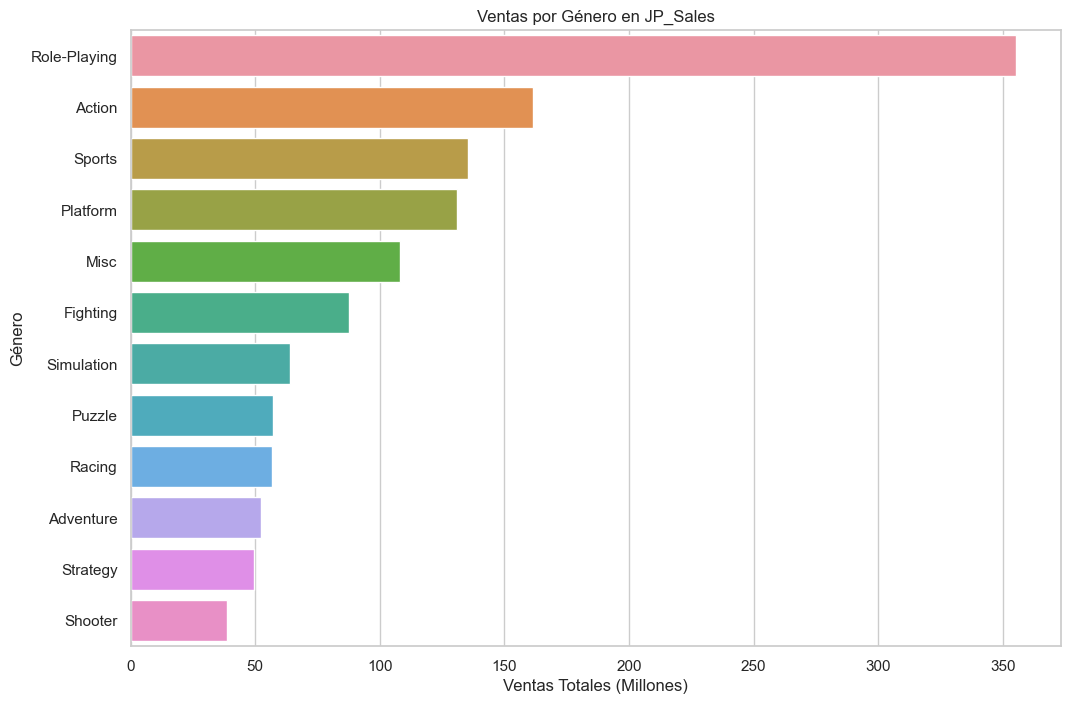

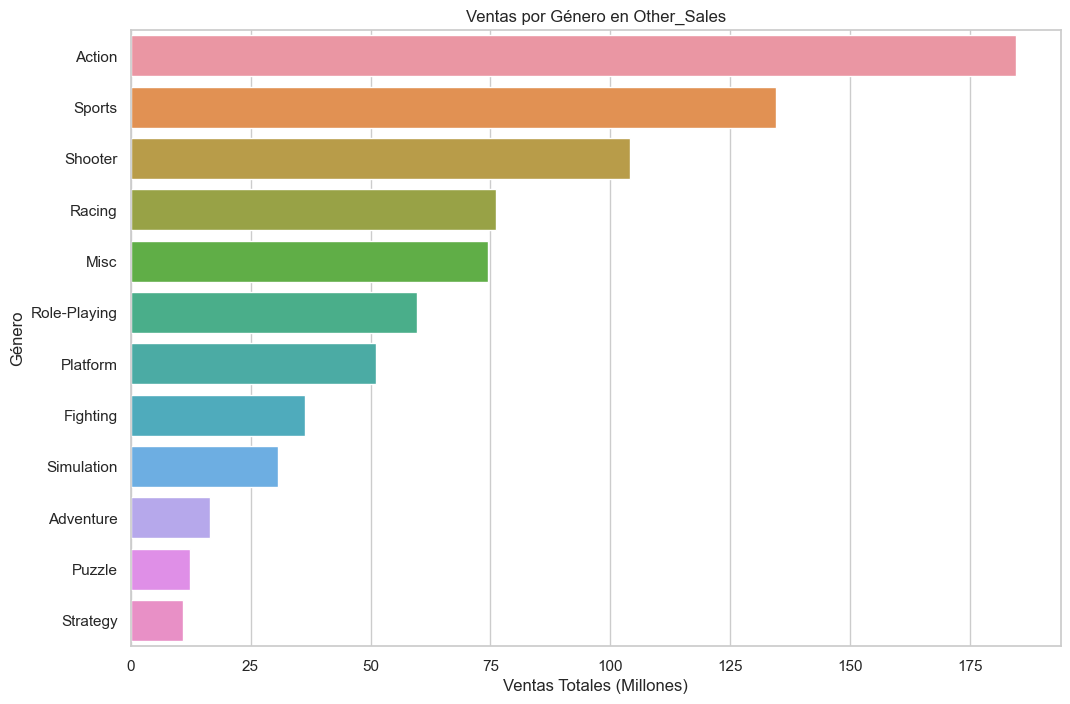

In [27]:
# Primero se hace una configuración de estilos de seaborn para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Lista de regiones
regiones = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Crear un gráfico para cada región
for region in regiones:
    plt.figure(figsize=(12, 8))
    sales_by_genre = df_filtrado.groupby('Genre')[region].sum().sort_values(ascending=False)
    sns.barplot(x=sales_by_genre.values, y=sales_by_genre.index)
    plt.title(f'Ventas por Género en {region}')
    plt.xlabel('Ventas Totales (Millones)')
    plt.ylabel('Género')
    plt.show()

Luego de implementar el código y generar los gráficos de barras que muestran cómo se distribuyen las ventas por cada región, se encontró que:

- En América del Norte (NA_Sales) el género que más se vende es Acción, con más de 879 millones en ventas.

- En Europa (EU_Sales) el género que más se vende es Acción, con más de 519 millones en ventas.

- En Japón (JP_Sales) el género que más se vende es Juegos de rol, con más de 355 millones en ventas.

- Y finalemente, en otras regiones (Other_Sales) el género que más se vende es Acción, con más de 184 millones en ventas.

Con esto se puede concluir, qué el género Acción es el género más aclamado en todas las regiones salvo en Japón.

Ahora, se implementa un gráfico interactivo donde se puede comprender de manera visualmente más atractiva lo anteriormente concluido.

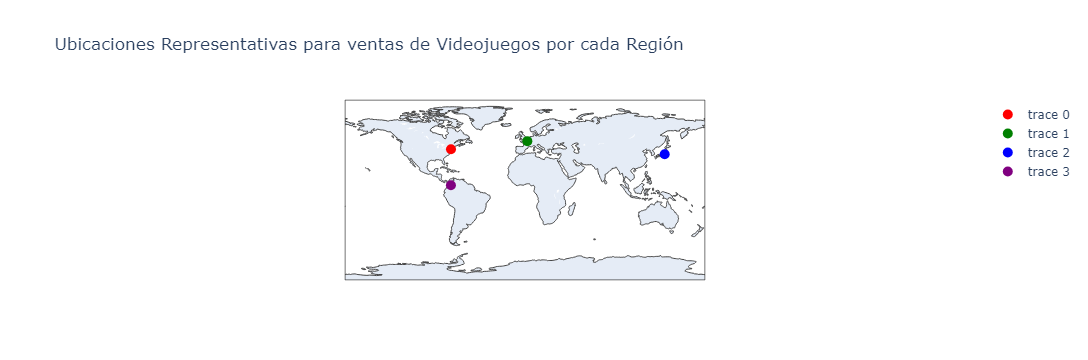

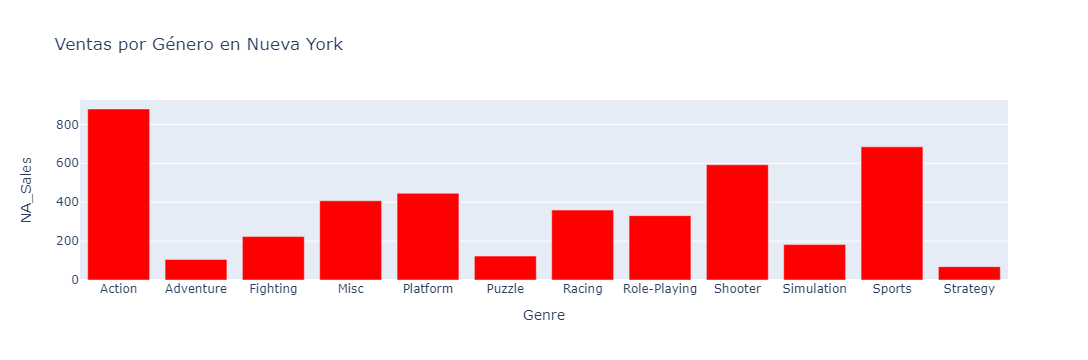

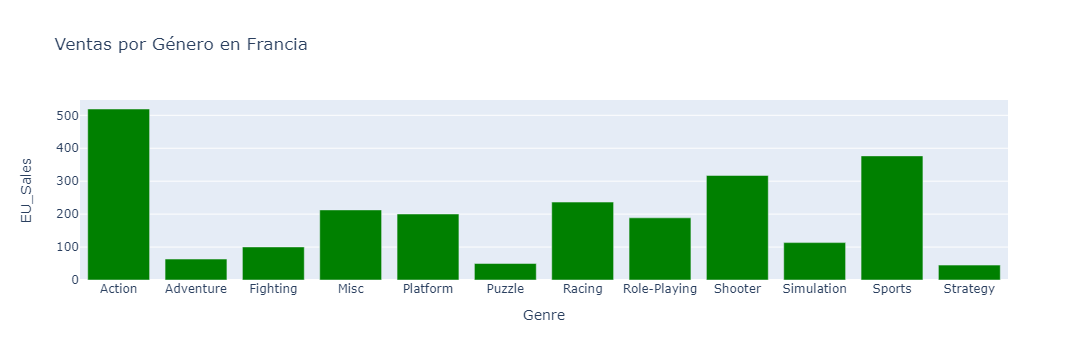

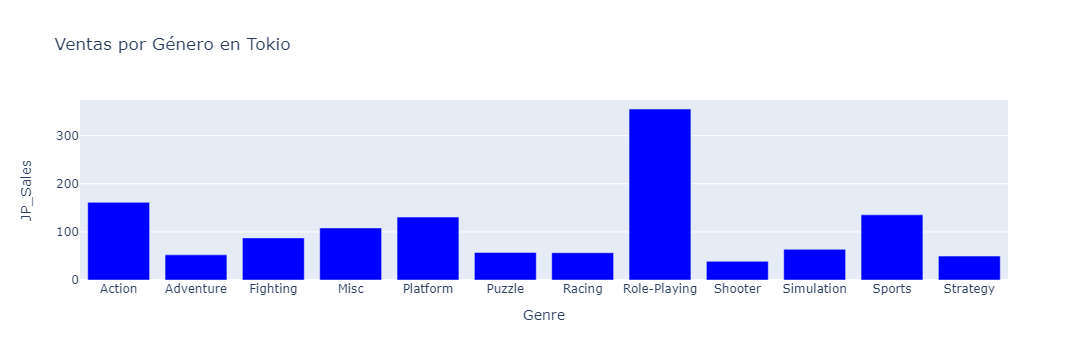

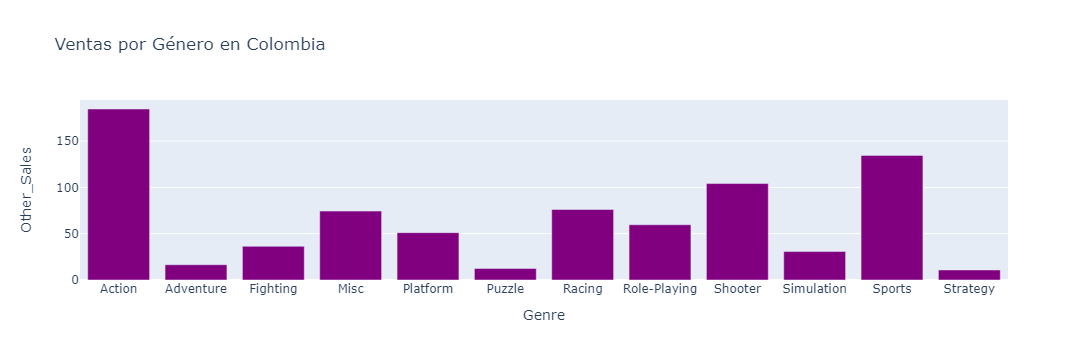

In [44]:
#Se importan las librerías para trabajar gráficos y/o crear visualizaciones de datos interactivos.

import plotly.graph_objects as go
import plotly.express as px

# Coordenadas y colores para cada ciudad
ciudades_info = {
    'Nueva York': {'coordenadas': [40.7128, -74.0060], 'color': 'red'},
    'Francia': {'coordenadas': [48.8566, 2.3522], 'color': 'green'},
    'Tokio': {'coordenadas': [35.6895, 139.6917], 'color': 'blue'},
    'Colombia': {'coordenadas': [4.7110, -74.0721], 'color': 'purple'}
}

# Primero se crea un mapa base
fig_mapa = go.Figure()

# Ahora se añaden puntos al mapa para cada ciudad con su color correspondiente
for ciudad, info in ciudades_info.items():
    lat, lon = info['coordenadas']
    fig_mapa.add_trace(go.Scattergeo(
        lon = [lon],
        lat = [lat],
        text = ciudad,
        marker = dict(
            size = 10,
            color = info['color']
        )
    ))

# Configuración del mapa
fig_mapa.update_layout(
    title = 'Ubicaciones Representativas para ventas de Videojuegos por cada Región',
    geo = dict(
        scope = 'world',
        projection_type = 'equirectangular'
    )
)

# Ahora se muestra el mapa
fig_mapa.show()

# Finalmente se crean y se muestran gráficos de barras para cada región con el color correspondiente, esto lo vuelve un gráfico más interactivo con
# respecto a los gráficos de barras generados anteriormente.
regiones = {'Nueva York': 'NA_Sales', 'Francia': 'EU_Sales', 'Tokio': 'JP_Sales', 'Colombia': 'Other_Sales'}
for ciudad, region in regiones.items():
    df_genero = df_filtrado.groupby('Genre')[region].sum().reset_index()
    bar_fig = px.bar(df_genero, x='Genre', y=region, title=f'Ventas por Género en {ciudad}',
                     color_discrete_sequence=[ciudades_info[ciudad]['color']])
    bar_fig.show()
    
## !!!!!!!!!!!!!! ESTE GRAFICO SE ENCUENTRA EN ARCHVO "GRAFICOS.pdf". !!!!!!!!!!!!!!!!!!!!!


### ¿Cuál es la plataforma que más vende, la más exitosa en ventas?
Para responder ésta pregunta se implementará un gráfico de barras sencillo, y posteriormente un gráfico de barras interactivo para que sea visualmente más atractivo y óptimo a la hora de determinar cual es la plataforma más exitosa en ventas.

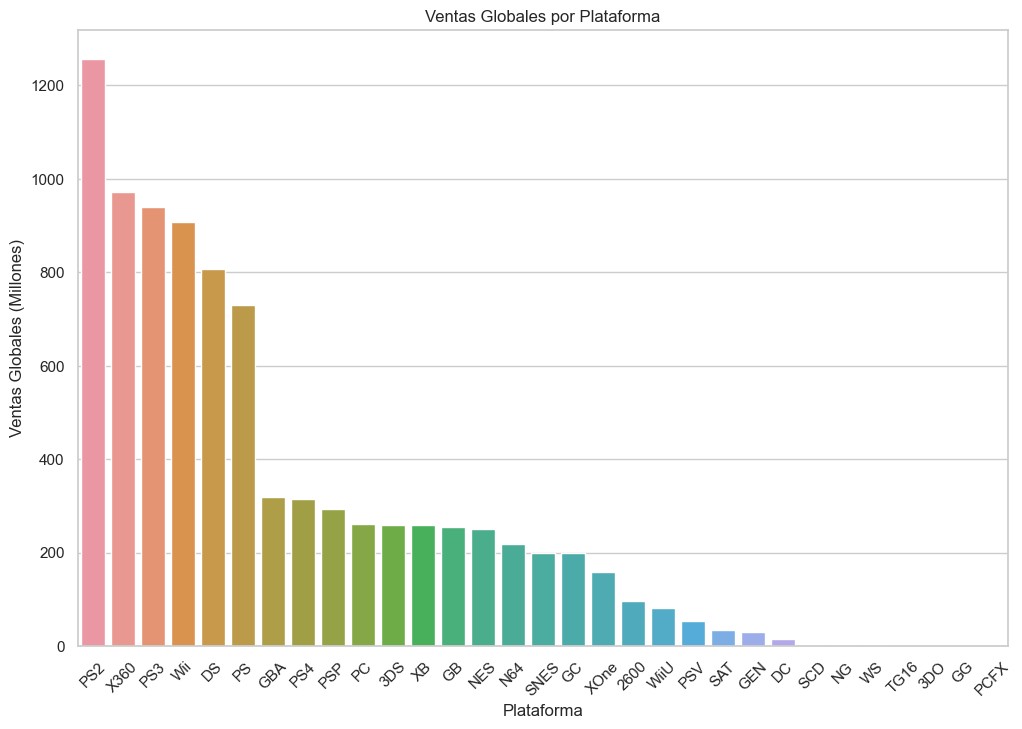

In [53]:
# Configuración de estilos de seaborn para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Ventas por Plataforma para determinar cual es la más exitosa.
plt.figure(figsize=(12, 8))
platform_sales = df_filtrado.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (Millones)')
plt.xticks(rotation=45)
plt.show()

Ahora se implementa el gráfico de barras interactivo para visualizar mejor los datos e información.

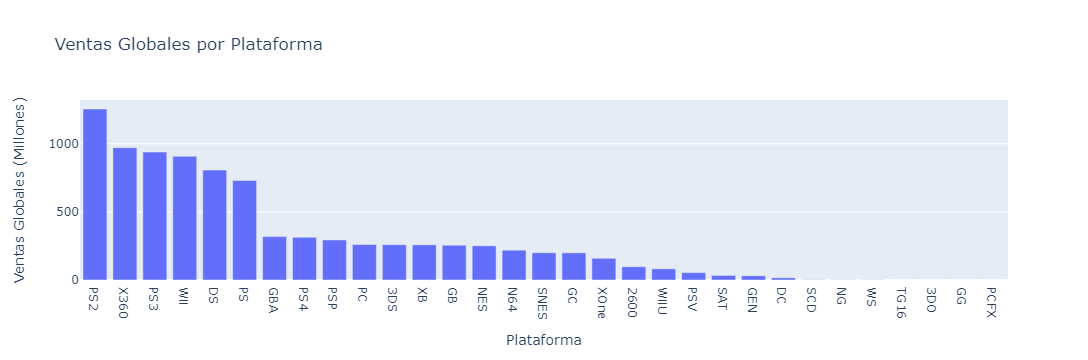

In [58]:
# Primero se agrupan los datos por plataforma y se calculan las ventas totales
ventas_por_plataforma = df_filtrado.groupby('Platform')['Global_Sales'].sum().reset_index()

# Ahora se ordenan los resultados de mayor a menor
ventas_por_plataforma = ventas_por_plataforma.sort_values('Global_Sales', ascending=False)

# Ahora se crea un gráfico de barras con Plotly Express (Interactivo)
fig = px.bar(ventas_por_plataforma,
             x='Platform',
             y='Global_Sales',
             title='Ventas Globales por Plataforma',
             labels={'Global_Sales': 'Ventas Globales (Millones)', 'Platform': 'Plataforma'})

# Finalmente se muestra el gráfico

## !!!!!!!!!!!!!! ESTE GRAFICO SE ENCUENTRA EN ARCHVO "GRAFICOS.pdf". !!!!!!!!!!!!!!!!!!!!!
fig.show()

Luego de realizar los gráficos de barras, se puede concluir que:

- La plataforma que más vende o la más exitosa en ventas es la plataforma PS2 (Play Station 2) con ventas históricas de 945 millones de ventas globales.

- En segundo lugar se encuentra la plataforma Xbox 360 con 853 millones en ventas.

- Finalmente, en el tercer lugar del top 3 se encuentra la plataforma PS3 (Play Station 3) con ventas de 784 millones.

### Serie temporal de ventas en Norte América por intervalos de 5 años.

In [74]:
#Primero se desea saber cual es el año de lanzamiento mínimo y máximo por cuestiones de curiosidad para saber si los datos son coherentes.

# Para el año máximo
max_year = df_filtrado['Year_of_Release'].max()
print(f"El año más reciente en los datos es: {max_year}")

# Para el año mínimo
min_year = df_filtrado['Year_of_Release'].min()
print(f"El año más antiguo en los datos es: {min_year}")

El año más reciente en los datos es: 2020.0
El año más antiguo en los datos es: 1980.0


Según esto, los datos si son coherentes y se pueden hacer 6 rangos o intervalos de 5 años cada uno.

C:\Users\conso\AppData\Local\Temp\ipykernel_11000\3238568415.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\conso\AppData\Local\Temp\ipykernel_11000\3238568415.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\conso\AppData\Local\Temp\ipykernel_11000\3238568415.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

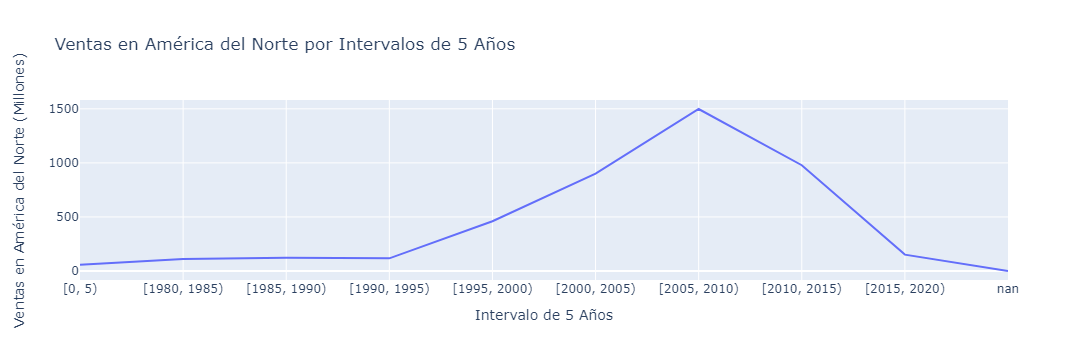

In [78]:
import pandas as pd
import plotly.express as px

# Primero confirmar que 'Year_of_Release' es de tipo entero para trabajar los años.
df_filtrado['Year_of_Release'] = df_filtrado['Year_of_Release'].fillna(0)
df_filtrado['Year_of_Release'] = df_filtrado['Year_of_Release'].astype(int)

# Ahora se crean intervalos de 5 años desde el año mínimo hasta el máximo
min_year = df_filtrado['Year_of_Release'].min()
max_year = df_filtrado['Year_of_Release'].max()
intervalos = range(min_year, max_year + 1, 5)

# Ahora se agrupan por intervalos de 5 años
df_filtrado['Intervalo_5_Anios'] = pd.cut(df_filtrado['Year_of_Release'], bins=intervalos, right=False)

# Se convierten los intervalos a strings para trabajar sin problema
df_filtrado['Intervalo_5_Anios'] = df_filtrado['Intervalo_5_Anios'].astype(str)

# Ahora se agrupan las ventas por estos intervalos
ventas_por_intervalo = df_filtrado.groupby('Intervalo_5_Anios')['NA_Sales'].sum().reset_index()

# Por consiguiente se muestra el gráfico de líneas
fig = px.line(ventas_por_intervalo,
              x='Intervalo_5_Anios',
              y='NA_Sales',
              title='Ventas en América del Norte por Intervalos de 5 Años',
              labels={'NA_Sales': 'Ventas en América del Norte (Millones)', 'Intervalo_5_Anios': 'Intervalo de 5 Años'})


## !!!!!!!!!!!!!! ESTE GRAFICO SE ENCUENTRA EN ARCHVO "GRAFICOS.pdf". !!!!!!!!!!!!!!!!!!!!!

fig.show()

Luego de realizar el gráfico de líneas o serie temporal de ventas en América del Norte en intervalos de 5 años, se puede concluir que:

- En los primeros dos intervalos de tiempo (1985-1990) y (1990-1995) las ventas en América del Norte eran mínimas, apenas se estaba estableciendo el mercado de videojuegos en ésta región.

- En los intervalos (1995-2000) y (2000-2005) se experimentó un fuerte crecimiento en las ventas en América del Norte, pues en este rango de tiempo fue donde hubieron más ventas, incluso alcanzando el pico de 1.127 millones en ventas en el año 2005.

- En los ultimos intervalos de tiempo (2005-2010) y (2010-aprox2015) se registró una caida en las ventas en ésta región, pues las ventas decrecieron de aproximadamente 738 a 102 millones.

### Ranking del juego por género.
Para realizar el Ranking del juego por géneros, primero se intentará definir o determinar el ranking del juego, esto se podría hacer basándonos en las ventas globales.

Es decir, se puede agrupar los datos por género y luego, para cada género, ordenar los juegos de acuerdo con sus ventas globales. Así obtendremos una lista de los juegos más vendidos en cada género.

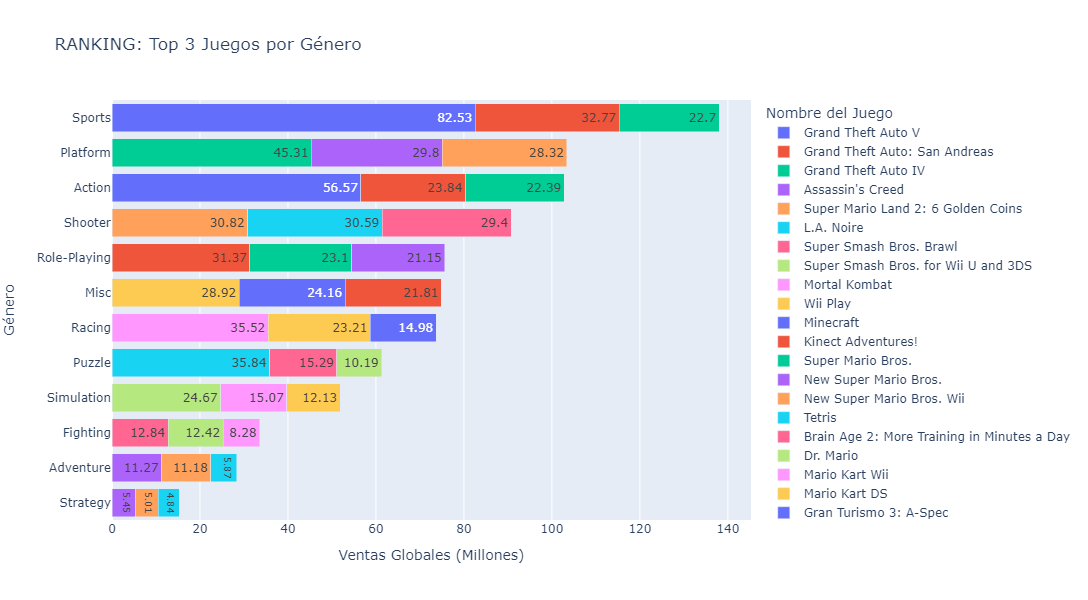

In [86]:
# Primero se agrupan por género y nombre del juego, y sumar las ventas globales
ventas_sumadas = df_filtrado.groupby(['Genre', 'Name'])['Global_Sales'].sum().reset_index()

# Ahora, para cada género, se obtiene el Top 3 o los tres mejores juegos con mayores ventas
top_3_por_genero = ventas_sumadas.groupby('Genre').apply(lambda x: x.sort_values('Global_Sales', ascending=False).head(3)).reset_index(drop=True)

# Ahora se crea un gráfico de barras con Plotly Express (interactivo)
fig = px.bar(top_3_por_genero,
             x='Global_Sales',
             y='Genre',
             color='Name',
             orientation='h',
             title='RANKING: Top 3 Juegos por Género',
             labels={'Global_Sales': 'Ventas Globales (Millones)', 'Genre': 'Género', 'Name': 'Nombre del Juego'},
             height=600)

# Se mejora la disposición y visualización por cuestiones de estética
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.update_traces(texttemplate='%{x}', textposition='inside')

# Finalmente se muestra el gráfico,

## !!!!!!!!!!!!!! ESTE GRAFICO SE ENCUENTRA EN ARCHVO "GRAFICOS.pdf". !!!!!!!!!!!!!!!!!!!!!

fig.show()

Según el gráfico interactivo se puede conocer el TOP 3 de juegos por cada género.

También se puede concluir que los géneros de videojuegos más vendidos son: En primer lugar el género de deportes (encabezado por el juego Wii Sports), en segundo lugar el género de acción (Encabezado por el exitoso Grand Thef Auto V), y en tercer lugar el género de disparos (Encabezado por la franquicia Call of Duty: Modern Warfare 3)